In [1]:
#Import libraries fro handling data
import pandas as pd
import numpy as np


# Data Ingestion

In [2]:
# read in test and train data 
Train = pd.read_csv(r'C:\Users\johna\OneDrive\Documents\House Price Reg\train.csv')
Test = pd.read_csv(r'C:\Users\johna\OneDrive\Documents\House Price Reg\test.csv')

Train.head()

print('Test', Test.shape, 'Train', Train.shape)

Test (1459, 80) Train (1460, 81)


# Data Wrangling

In [3]:
print ("Rows     : " ,Train.shape[0])
print ("Columns  : " ,Train.shape[1])
print ("\nFeatures : \n" ,Train.columns.tolist())
print ("\nMissing values :  ", Train.isnull().sum().values.sum())
print ("\nUnique values :  \n",Train.nunique())

print('Test', Test.shape, 'Train', Train.shape)

Rows     :  1460
Columns  :  81

Features : 
 ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3

In [4]:
# Get a summary of all features in the data and their types
Train.info()

# Remove duplicates from training data
Train.duplicated(subset=None, keep='first')

print('Test', Test.shape, 'Train', Train.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# next I'll check for missing values in training data
pd.options.display.min_rows = 115
Train.isnull().sum().sort_values(ascending=False)

print('Test', Test.shape, 'Train', Train.shape)

Test (1459, 80) Train (1460, 81)


In [6]:
# Lets get info on the missing values and decide what we will do with them

missing = ["PoolQC",
"MiscFeature",
"Alley",
"Fence",
"FireplaceQu",
"LotFrontage",
"GarageCond",
"GarageType",
"GarageYrBlt",
"GarageFinish",
"GarageQual",
"BsmtExposure",
"BsmtFinType2",
"BsmtFinType1",
"BsmtCond",
"BsmtQual",
"MasVnrArea",
"MasVnrType",
"Electrical"
]

Train[missing].info()

# Assume poolQC missing values are due to property not having pool (which makes sense for the data )
values= {'PoolQC':'No Pool', 'MiscFeature':'No Feature', 'Alley':'No alley access', 'Fence':'No Fence', 'FireplaceQu':'No Fireplace',
         'GarageCond': 'No Garage', 'GarageType':'No Garage', 'GarageArea':0, 'GarageYrBlt':'None built', 'GarageFinish': 'No Garage', 'GarageQual': 'No Garage',
         'BsmtExposure': 'No Basement', 'BsmtFinType2':'Not Applicable', 'BsmtFinType1':'Not Applicable', 'BsmtCond':'No Basement', 'BsmtQual': 'No Basement',
         'MasVnrArea':0, 'MasVnrType':'No Veneer', 'LotFrontage':0}

Train.fillna(value=values, inplace=True)
Test.fillna(value=values, inplace=True)

Train.isna().sum().sort_values(ascending=False)

# for other missing categories we will replace with the mode
features = Train.select_dtypes(include=['object']).columns

for features in features:
    Train[features].fillna(Train[features].mode()[0], inplace=True)
    Test[features].fillna(Test[features].mode()[0], inplace=True)

    
# some basement values are set to NANs when they should be zero
Basementmetrics = ['BsmtHalfBath',
'BsmtFullBath' ,
'BsmtFinSF1',
'GarageCars' , 
'TotalBsmtSF' ,
'BsmtUnfSF' ,
'BsmtFinSF2' ,
]

for Basementmetrics in Basementmetrics:
    Test.loc[(Test[Basementmetrics].isnull()), Basementmetrics]=0
    Train.loc[(Train[Basementmetrics].isnull()), Basementmetrics]=0
    
# mising info for Garage cars should be replaced 
Test.loc[(Test.GarageCars.isnull()), 'GarageCars']=0
Train.loc[(Train.GarageCars.isnull()), 'GarageCars']=0   


print('Test', Test.shape, 'Train', Train.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PoolQC        7 non-null      object 
 1   MiscFeature   54 non-null     object 
 2   Alley         91 non-null     object 
 3   Fence         281 non-null    object 
 4   FireplaceQu   770 non-null    object 
 5   LotFrontage   1201 non-null   float64
 6   GarageCond    1379 non-null   object 
 7   GarageType    1379 non-null   object 
 8   GarageYrBlt   1379 non-null   float64
 9   GarageFinish  1379 non-null   object 
 10  GarageQual    1379 non-null   object 
 11  BsmtExposure  1422 non-null   object 
 12  BsmtFinType2  1422 non-null   object 
 13  BsmtFinType1  1423 non-null   object 
 14  BsmtCond      1423 non-null   object 
 15  BsmtQual      1423 non-null   object 
 16  MasVnrArea    1452 non-null   float64
 17  MasVnrType    1452 non-null   object 
 18  Electrical    1459 non-null 

In [7]:
#Change variable types

# Year built is currently an integer we should treat this as a category for the purpose of this task 

Train.YearBuilt = Train.YearBuilt.astype(str)
Test.YearBuilt = Test.YearBuilt.astype(str)

Train.YrSold = Train.YrSold.astype(str)
Test.YrSold = Test.YrSold.astype(str)

Train.GarageYrBlt = Train.GarageYrBlt.astype(str)
Test.GarageYrBlt = Test.GarageYrBlt.astype(str)

Train.YearRemodAdd = Train.YearRemodAdd.astype(str)
Test.YearRemodAdd = Test.YearRemodAdd.astype(str)


# MSSUbCLass, Overallcond & OverallQual: we will decode this to avoid numeric mix-up
MSSUbCLass = {20:"1-STORY 1946 & NEWER ALL STYLES",
30:"1-STORY 1945 & OLDER",
40:"1-STORY W/FINISHED ATTIC ALL AGES",
45:"1-1/2 STORY - UNFINISHED ALL AGES",
50:"1-1/2 STORY FINISHED ALL AGES",
60:"2-STORY 1946 & NEWER",
70:"2-STORY 1945 & OLDER",
75:"2-1/2 STORY ALL AGES",
80:"SPLIT OR MULTI-LEVEL",
85:"SPLIT FOYER",
90:"DUPLEX - ALL STYLES AND AGES",
120:"1-STORY PUD (Planned Unit Development) - 1946 & NEWER",
150:"1-1/2 STORY PUD - ALL AGES",
160:"2-STORY PUD - 1946 & NEWER",
180:"PUD - MULTILEVEL - INCL SPLIT LEV/FOYER",
190:"2 FAMILY CONVERSION - ALL STYLES AND AGES"}


OverallQualCond = {10:"Very Excellent",
9:"Excellent",
8:"Very Good",
7:"Good",
6:"Above Average",
5:"Average",
4:"Below Average",
3:"Fair",
2:"Poor",
1:"Very Poor"
}



Train.replace({'OverallQual': OverallQualCond, 'OverallCond': OverallQualCond, 'MSSubClass': MSSUbCLass}, inplace=True)
Test.replace({'OverallQual': OverallQualCond, 'OverallCond': OverallQualCond, 'MSSubClass': MSSUbCLass}, inplace=True)

                                                     

print('Test', Test.shape, 'Train', Train.shape)

Test (1459, 80) Train (1460, 81)


# Exploritory Data Analysis

In [8]:
# let's do some descriptive statistics on our data to make sure nothing looks unusual
pd.set_option('display.max_columns', None) 
Train.describe()
#Train.describe()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,57.623288,10516.828082,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,180921.195890
std,421.610009,34.664304,9981.264932,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,79442.502883
min,1.000000,0.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000
25%,365.750000,42.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,129975.000000
50%,730.500000,63.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,163000.000000
75%,1095.250000,79.000000,11601.500000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,214000.000000
max,1460.000000,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,755000.000000


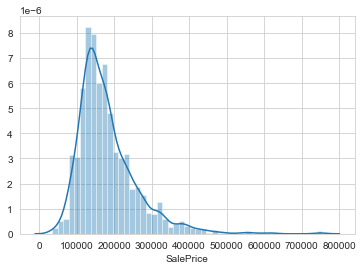

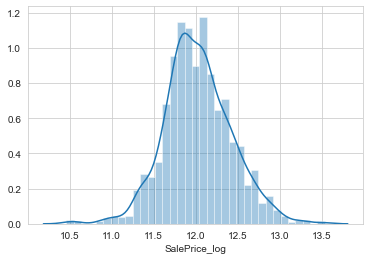

In [9]:
import seaborn as sns 
import matplotlib 
import matplotlib.pyplot as plt

x = Train.SalePrice
sns.set_style('whitegrid')
sns.distplot(x)
plt.show()

Train['SalePrice_log'] = np.log(Train.SalePrice)
x = Train.SalePrice_log
sns.distplot(x)
plt.show()




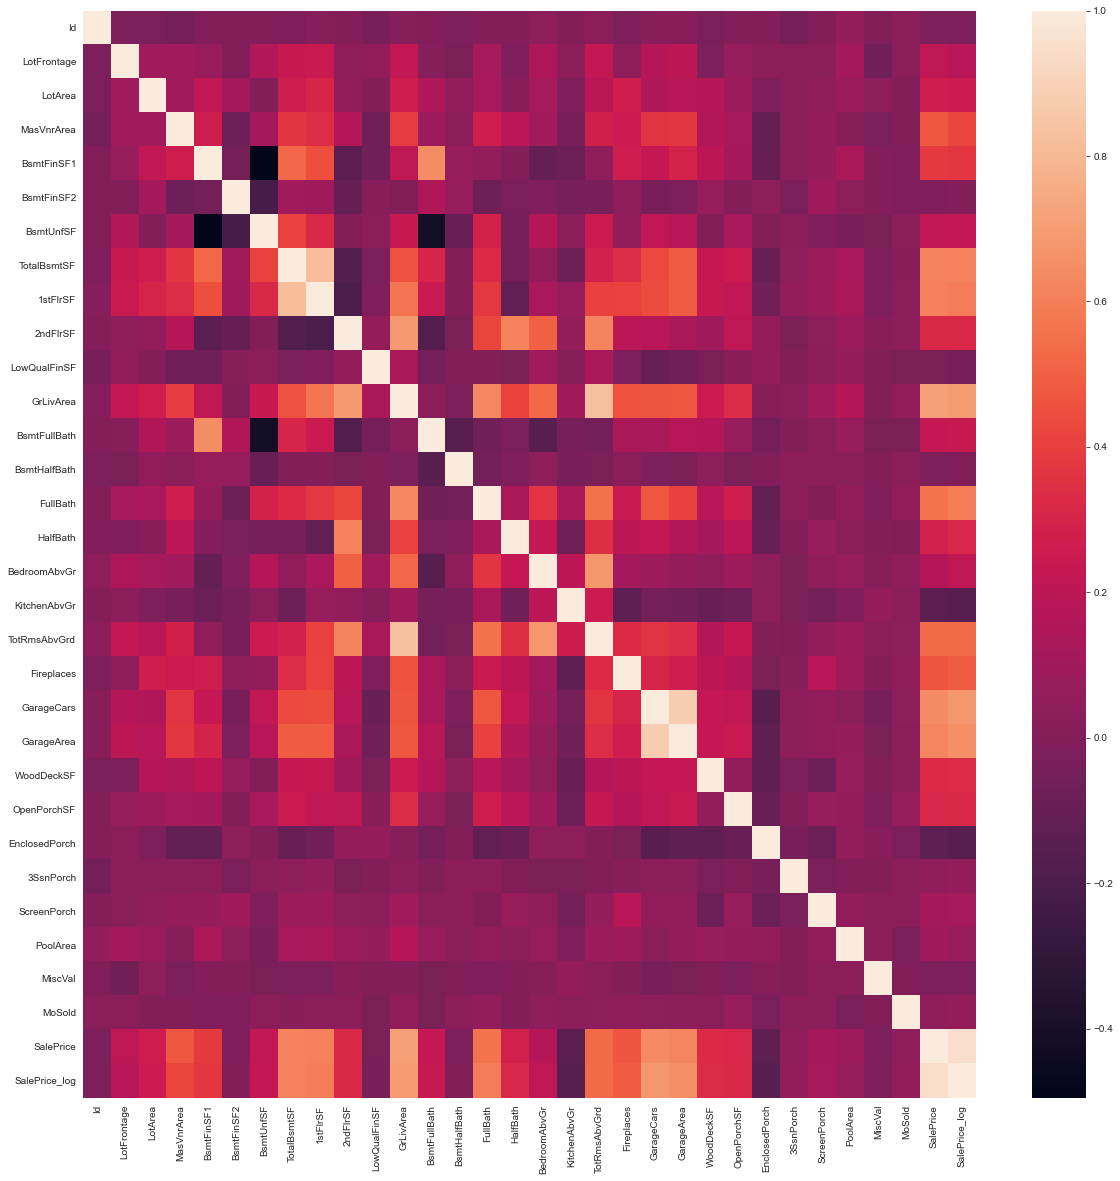

In [10]:
# Lets explore the correlations in our data set 
plt.figure(figsize=(20,20))
sns.heatmap(Train.corr())

C:\Users\johna\miniconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
C:\Users\johna\miniconda3\lib\site-packages\seaborn\axisgrid.py:1668: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(height, height))


<Figure size 720x720 with 0 Axes>

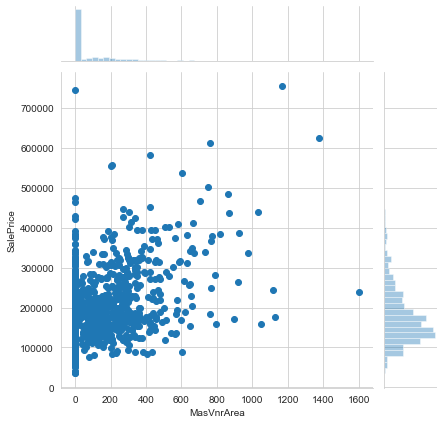

<Figure size 720x720 with 0 Axes>

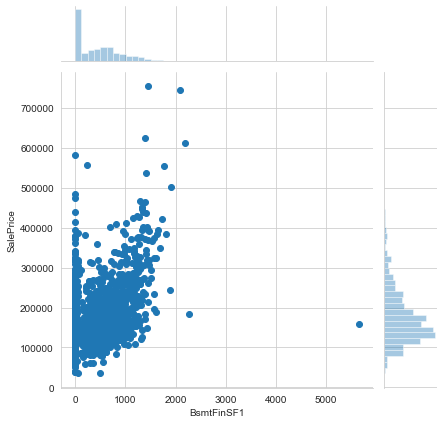

<Figure size 720x720 with 0 Axes>

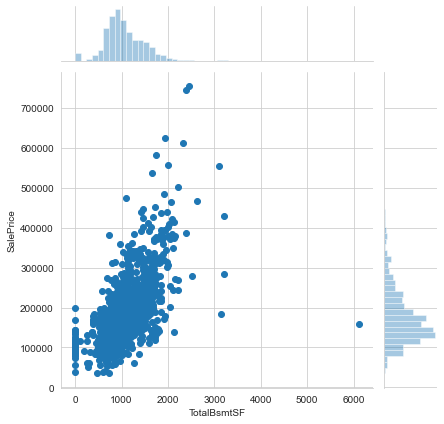

<Figure size 720x720 with 0 Axes>

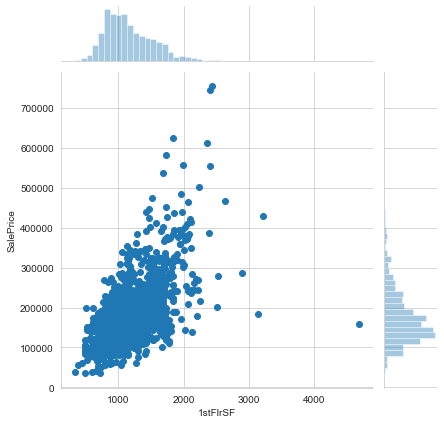

<Figure size 720x720 with 0 Axes>

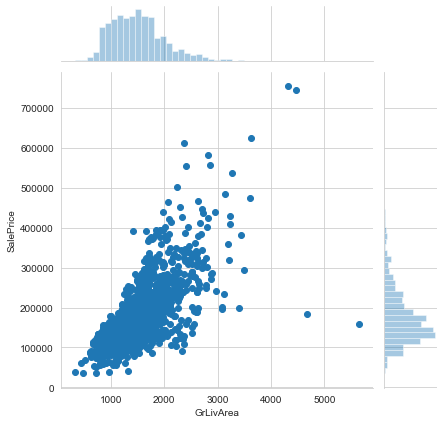

<Figure size 720x720 with 0 Axes>

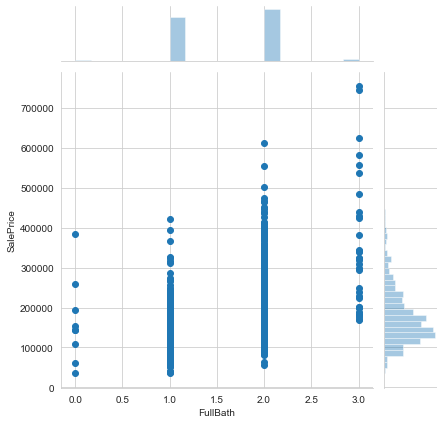

<Figure size 720x720 with 0 Axes>

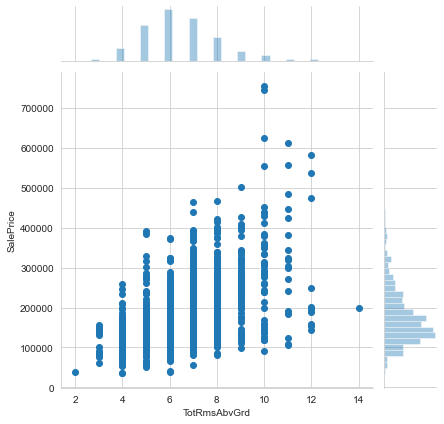

<Figure size 720x720 with 0 Axes>

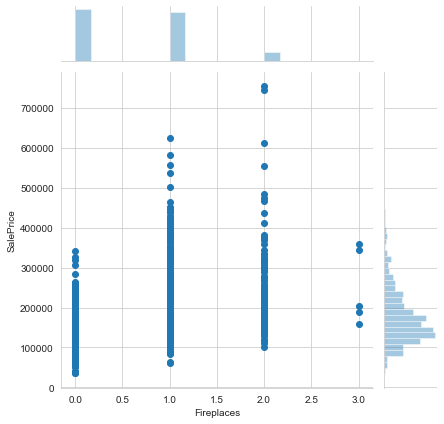

<Figure size 720x720 with 0 Axes>

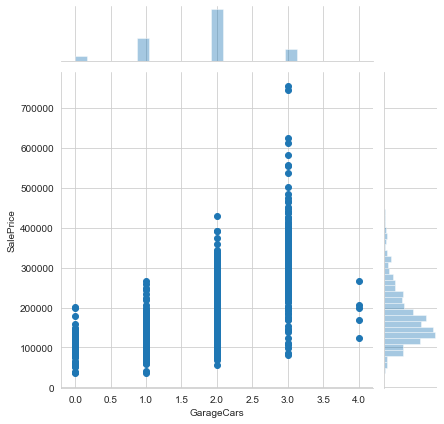

<Figure size 720x720 with 0 Axes>

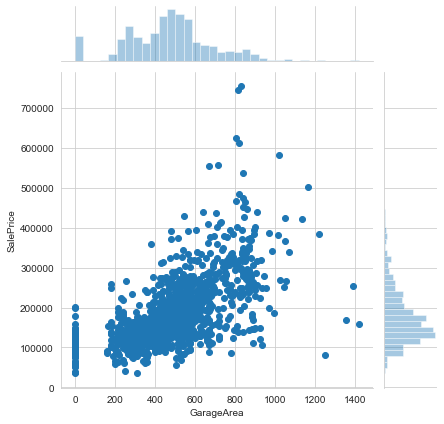

<Figure size 720x720 with 0 Axes>

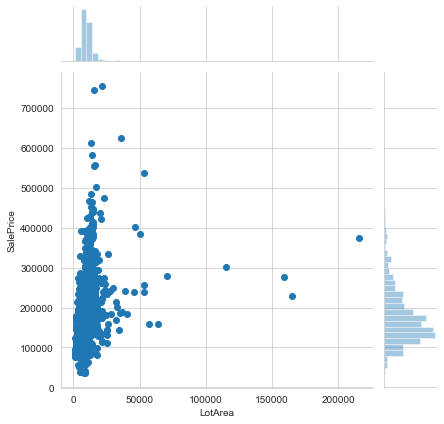

<Figure size 720x720 with 0 Axes>

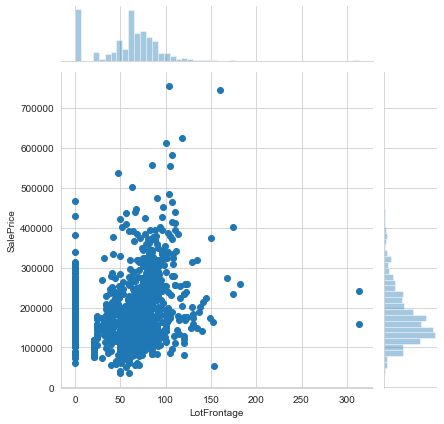

In [11]:
#We will plot some joint histogram and scatter grphs to look at correlated features in more detail 
y = Train.SalePrice 
features = ['MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'LotArea', 'LotFrontage']

for features in features:
    sns.set_style('whitegrid')
    plt.figure(figsize=(10,10))
    x = Train[features]
    sns.jointplot(x=x, y=y, data=Train)

C:\Users\johna\miniconda3\lib\site-packages\seaborn\axisgrid.py:318: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


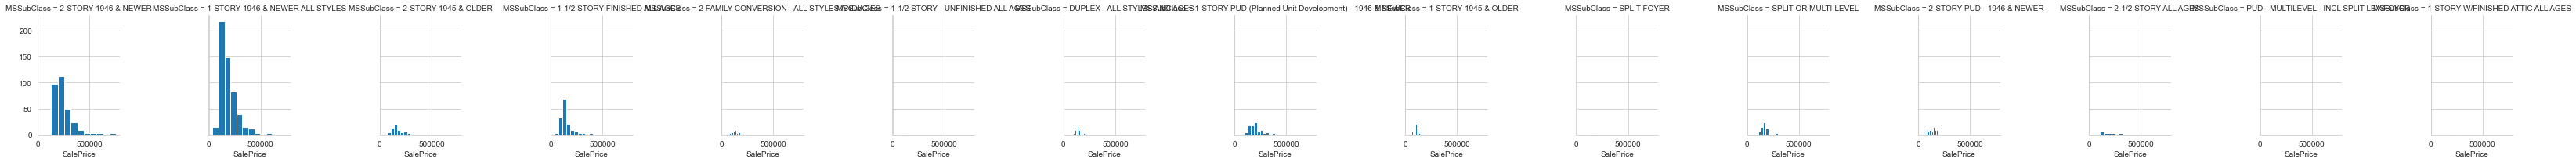

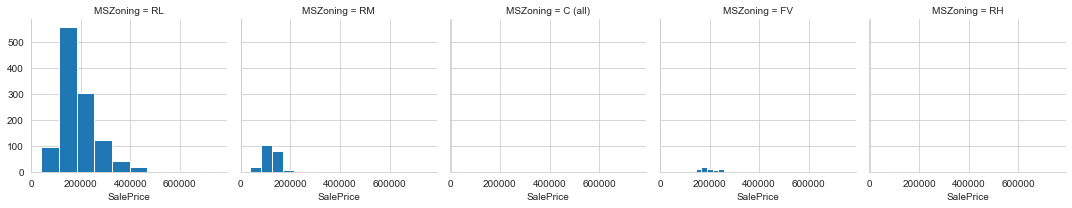

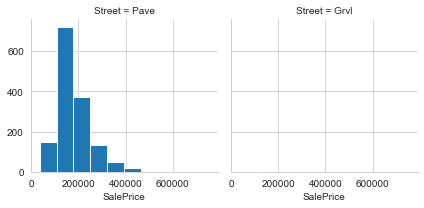

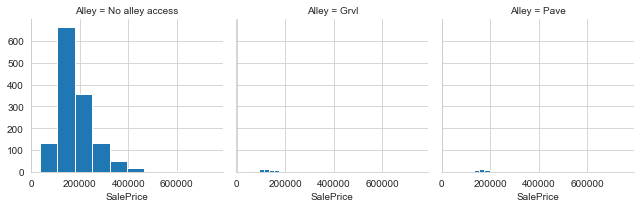

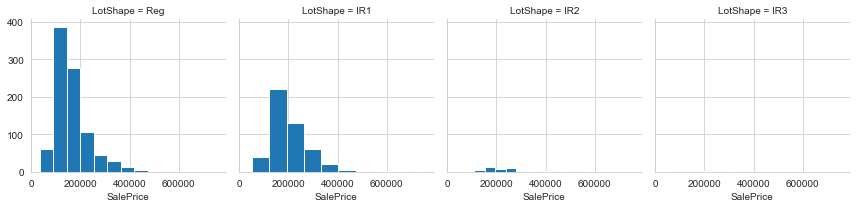

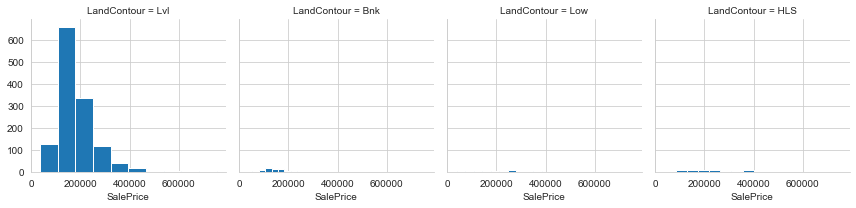

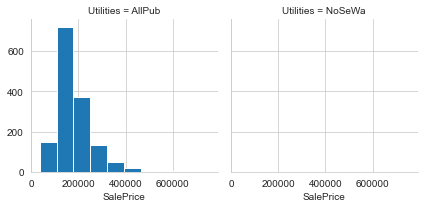

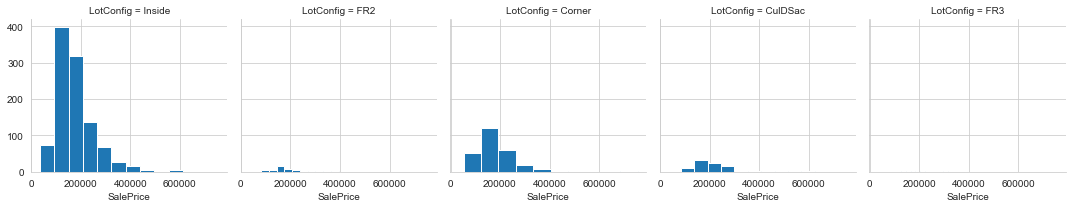

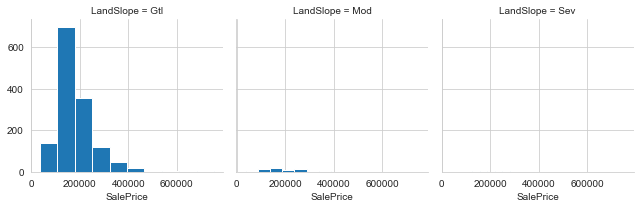

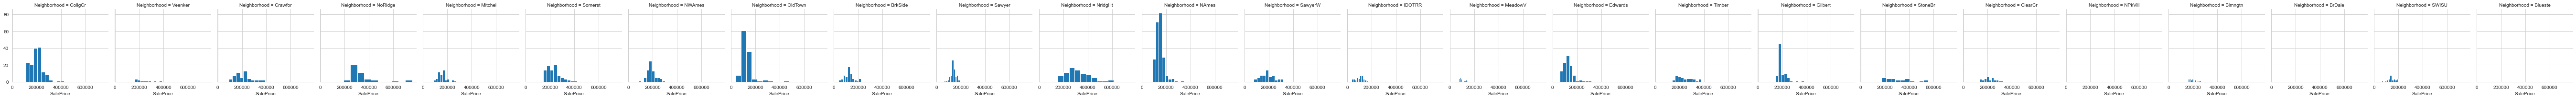

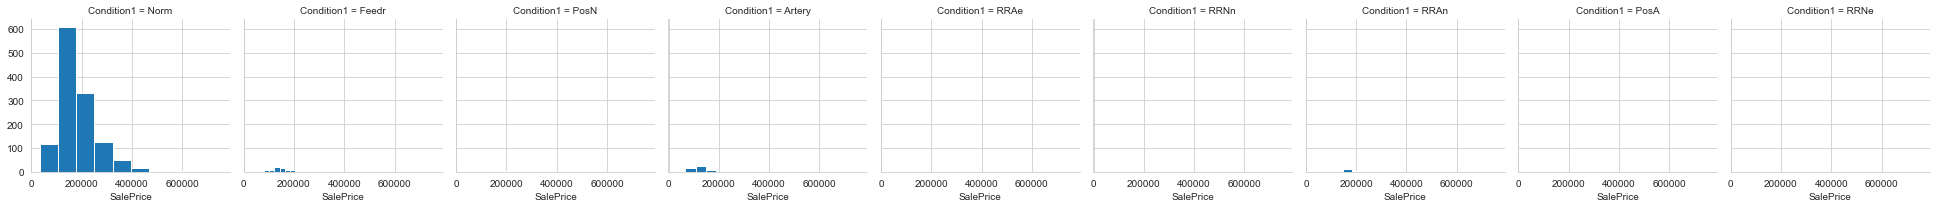

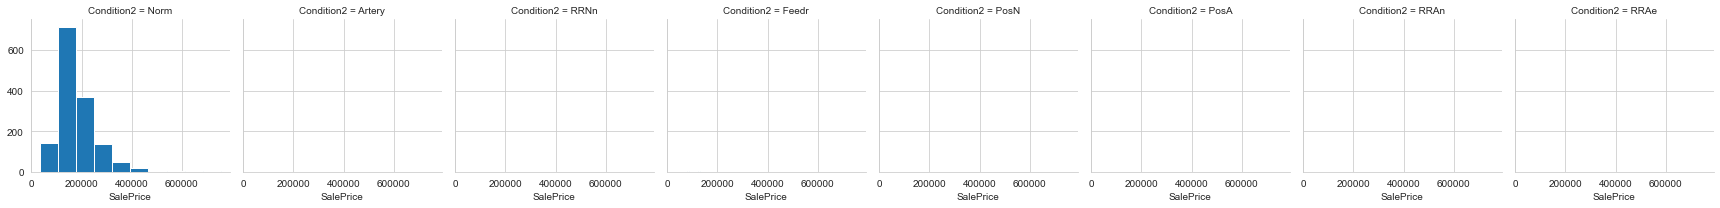

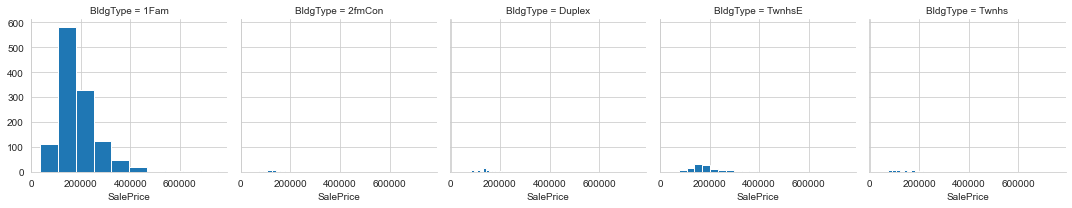

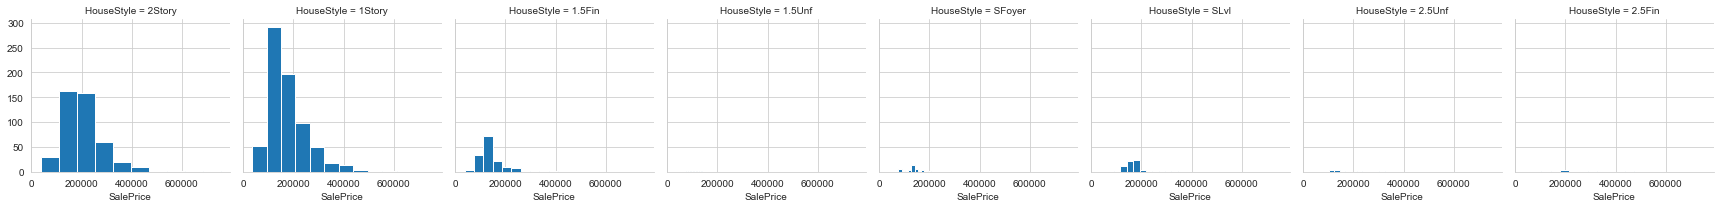

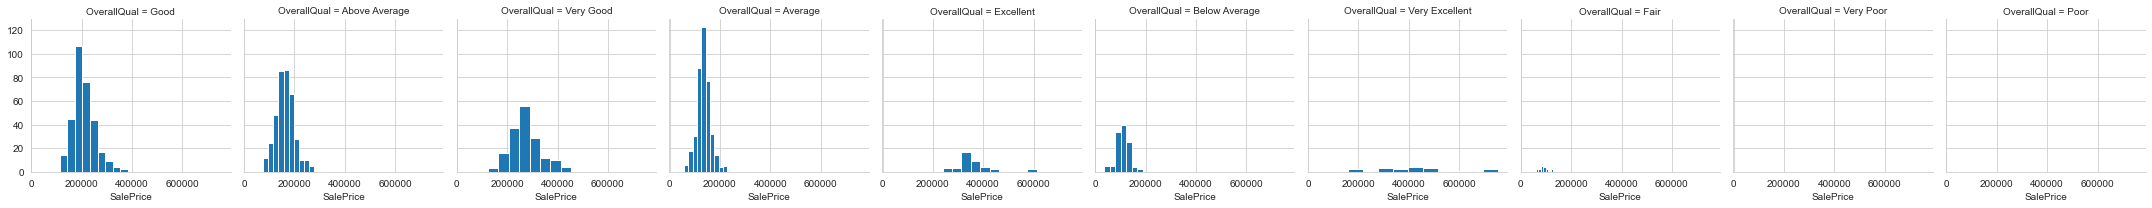

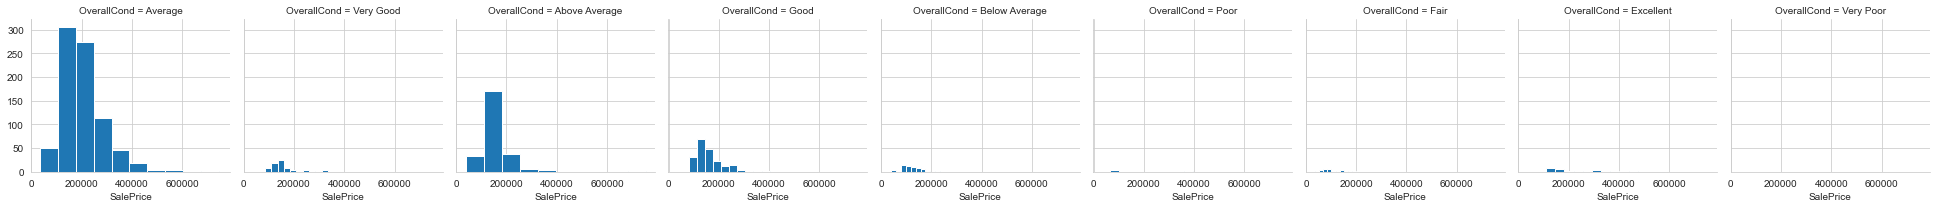

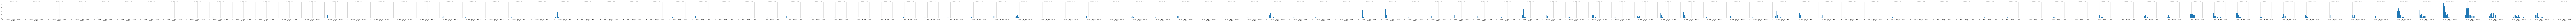

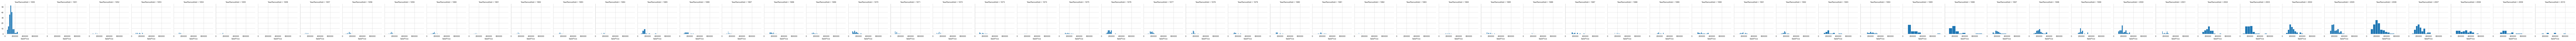

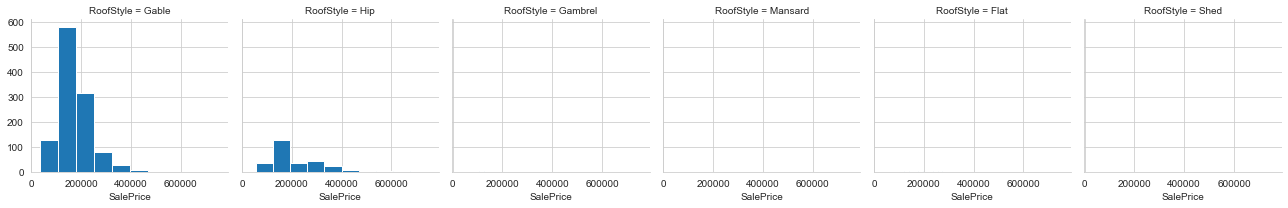

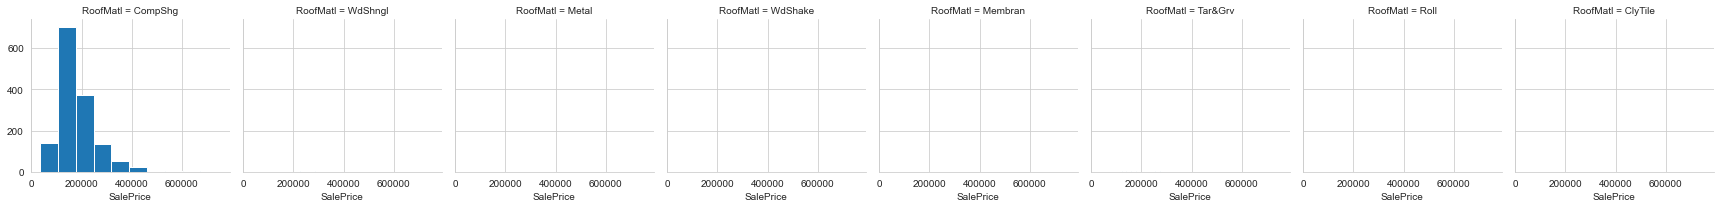

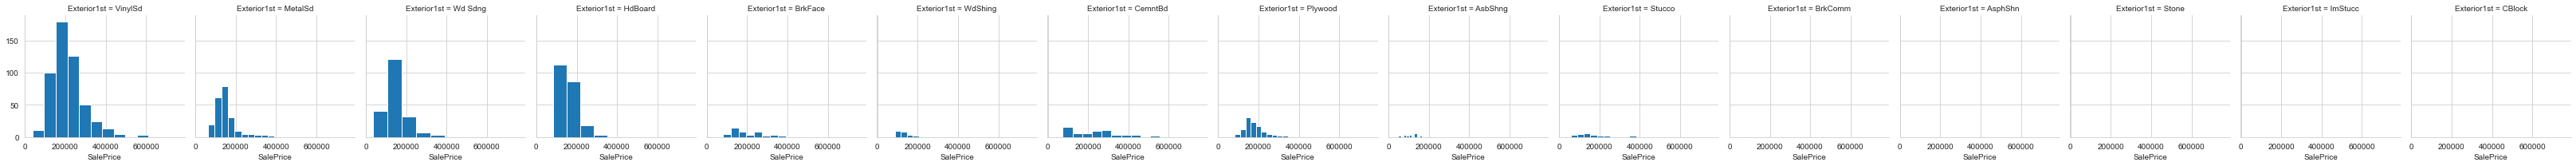

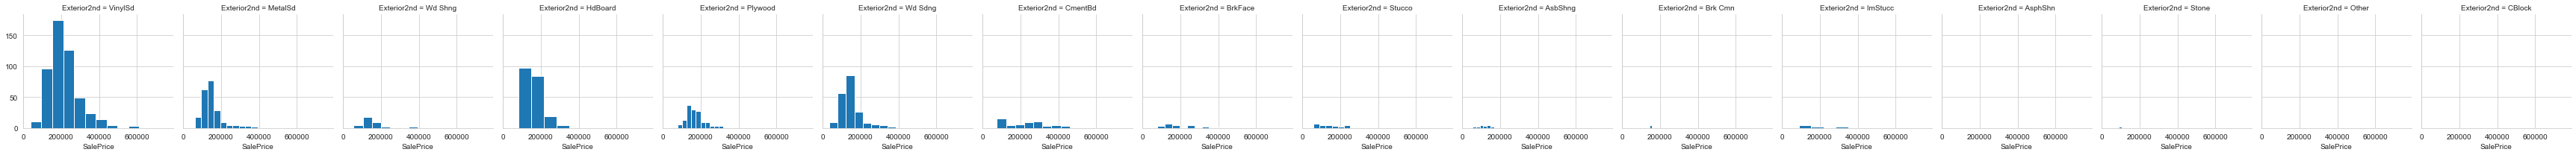

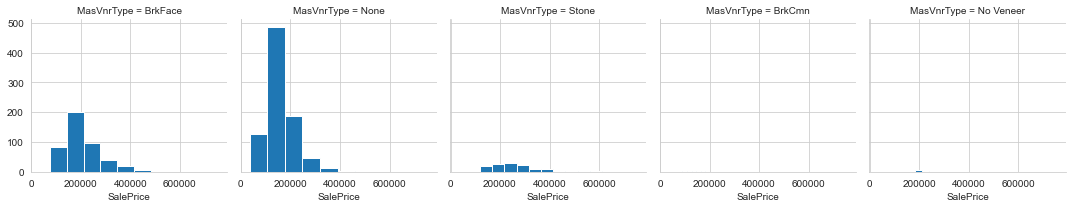

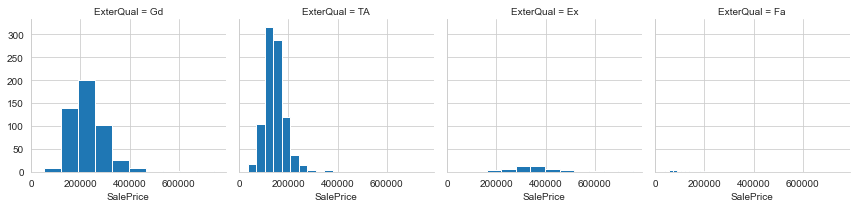

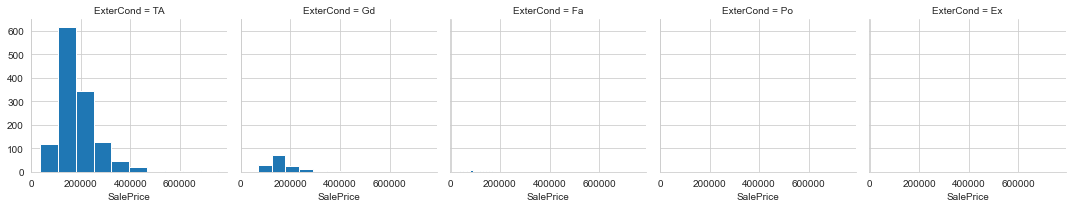

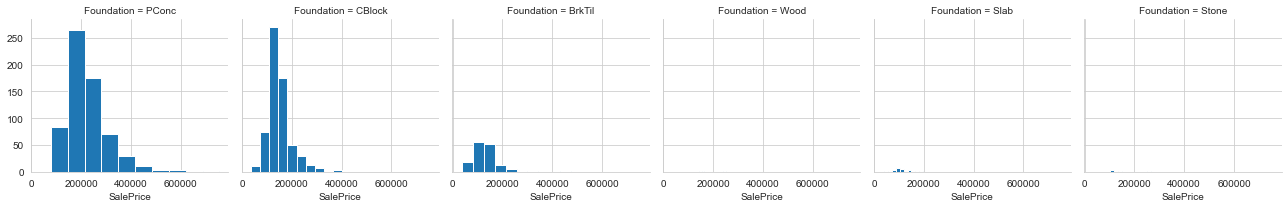

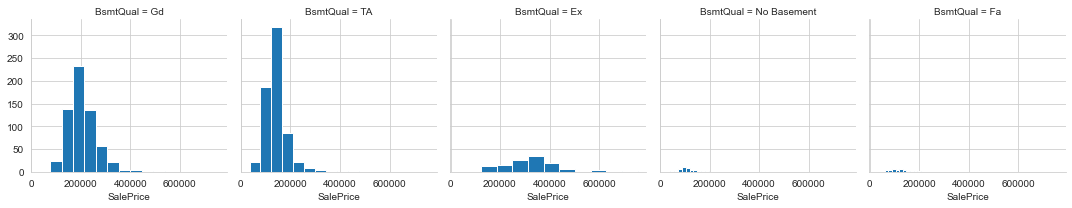

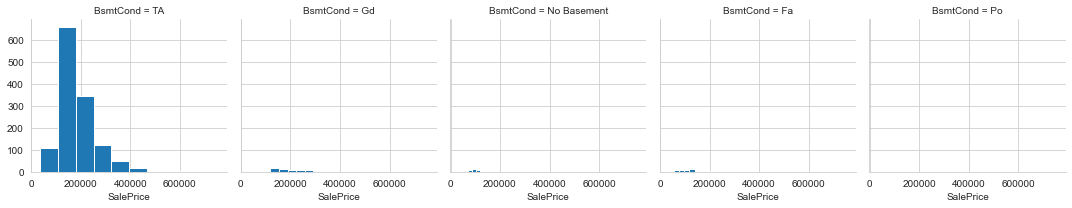

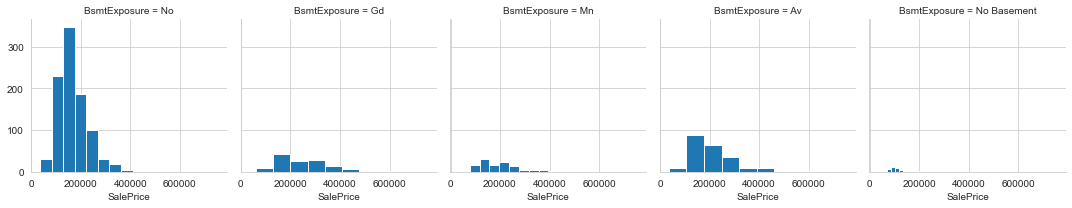

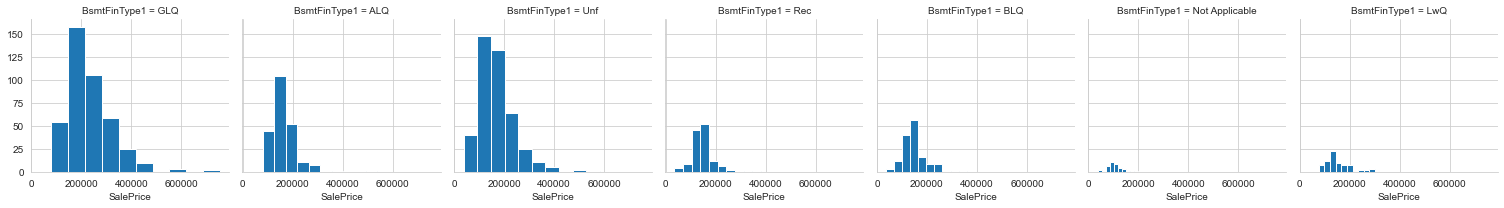

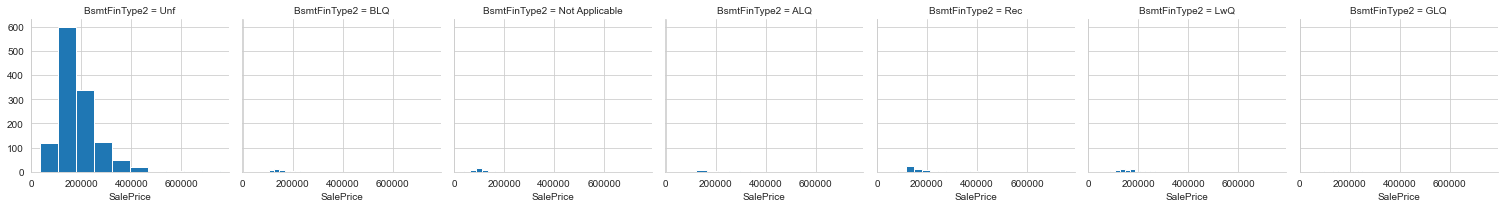

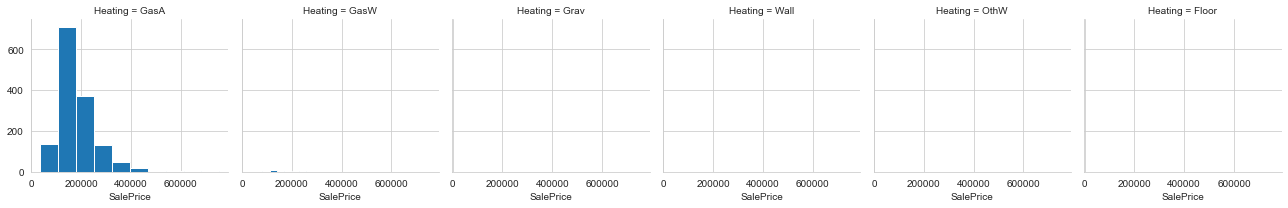

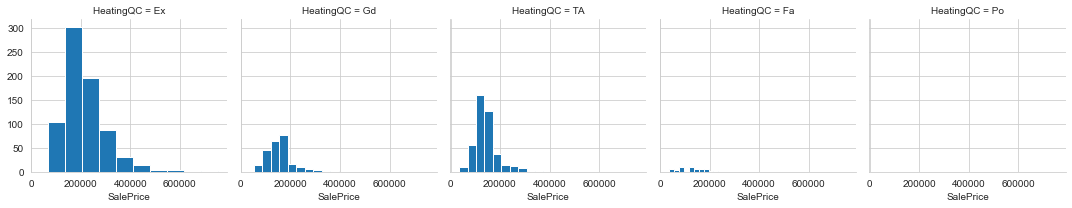

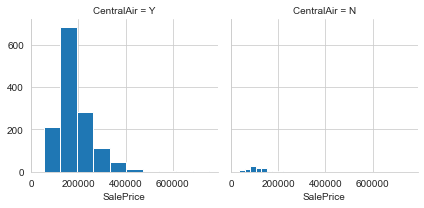

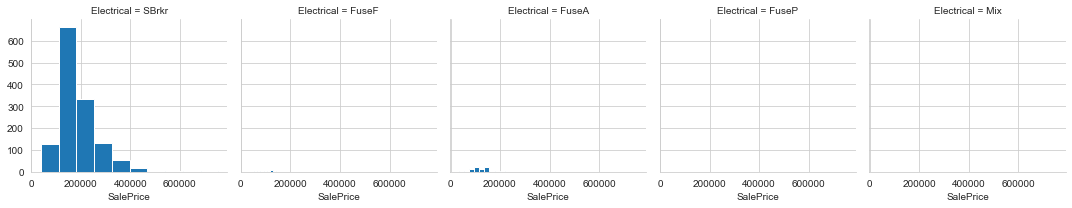

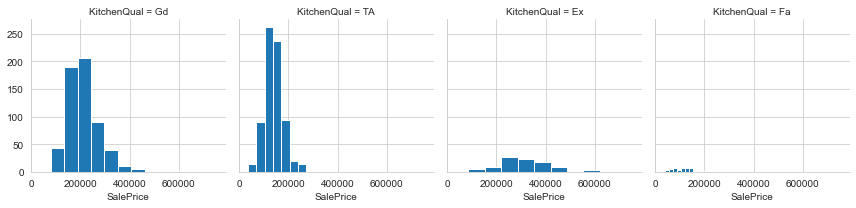

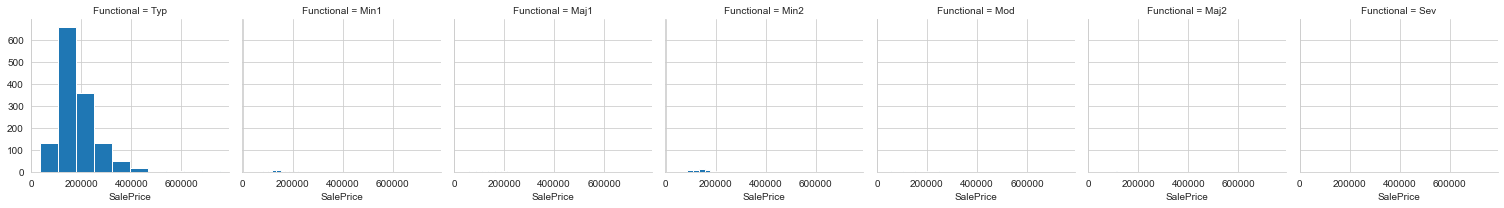

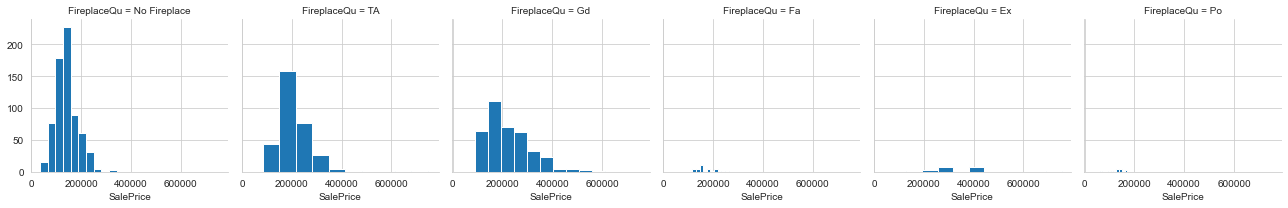

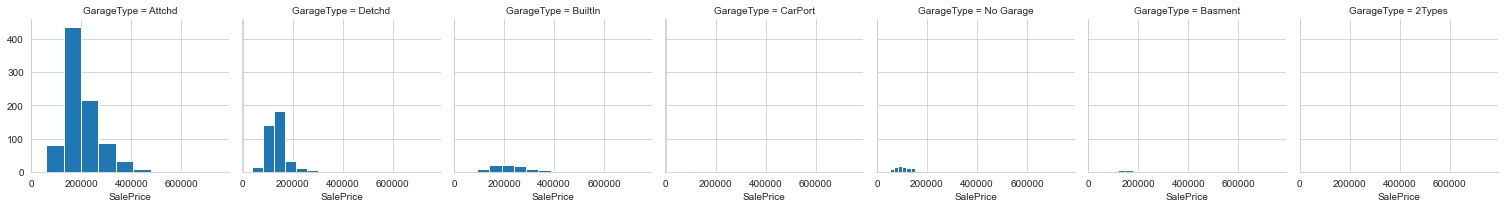

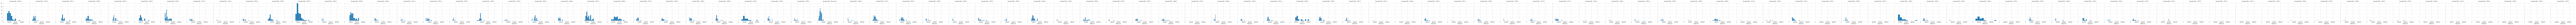

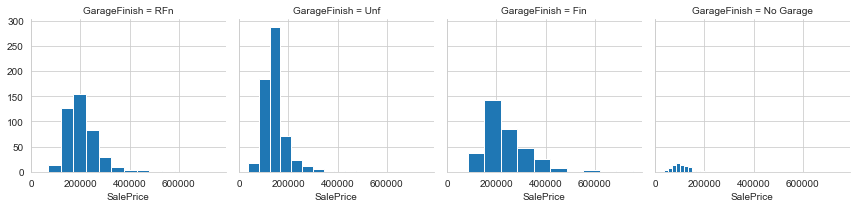

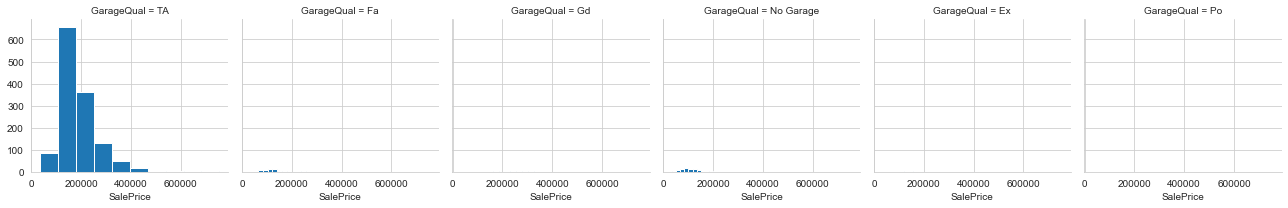

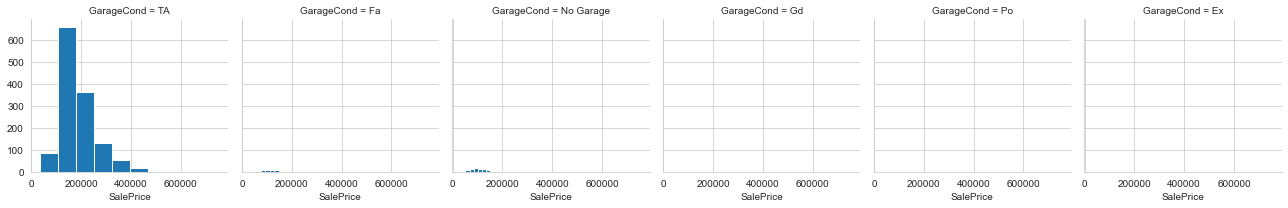

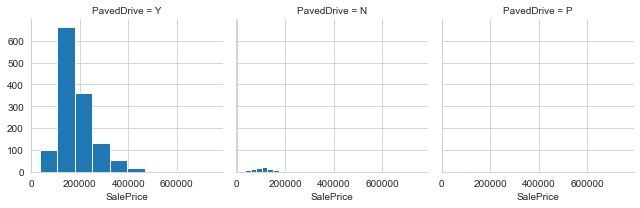

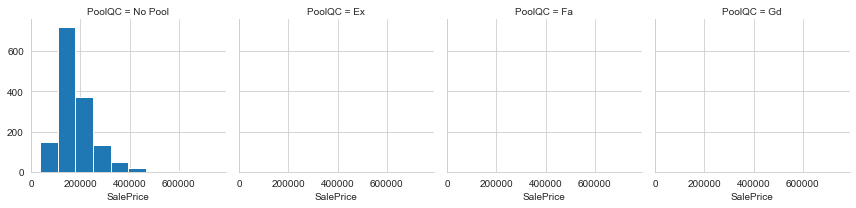

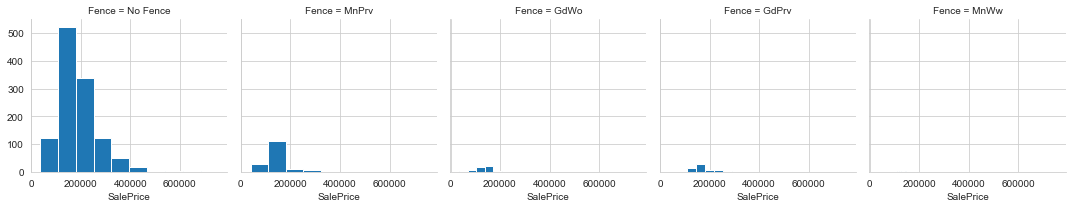

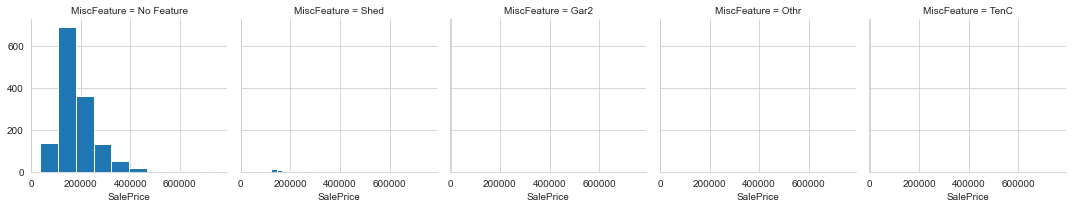

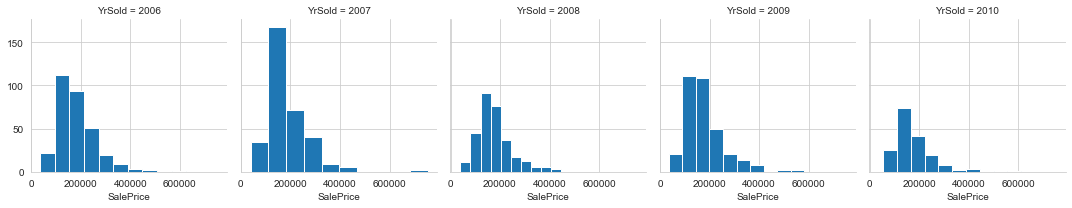

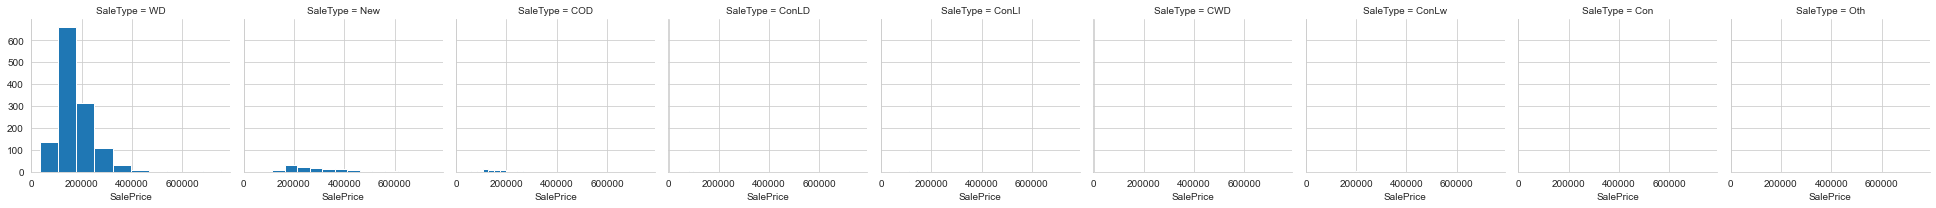

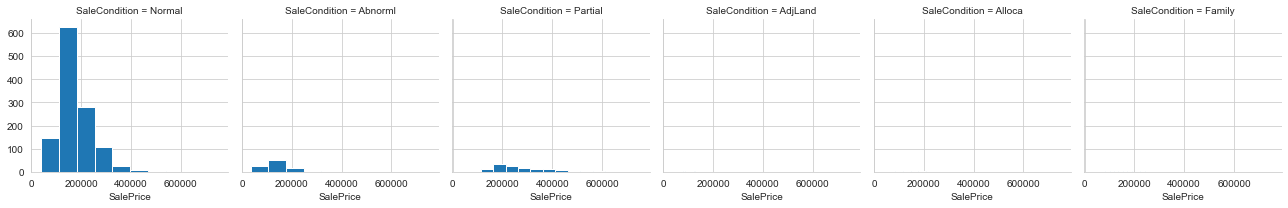

In [12]:
# Perform analysis for categorical vairbales 

# Nothin looks untoward, sale prices look approximately normally distirbuted across each category 

features = Train.select_dtypes(include=['object']).columns

for features in features: 
    g = sns.FacetGrid(Train, col=features)
    g.map(plt.hist, 'SalePrice');


In [13]:
# Convert training and test data to one hot encoded numeric data 

# Create a onehotencoder object that relables columns after transforming 
from sklearn.preprocessing import OneHotEncoder as SklearnOneHotEncoder

# Wrapper for one hot encoder to allow labelling of encoded variables 
class OneHotEncoder(SklearnOneHotEncoder):
    def __init__(self, **kwargs):
        super(OneHotEncoder, self).__init__(**kwargs)
        self.fit_flag = False

    def fit(self, X, **kwargs):
        out = super().fit(X)
        self.fit_flag = True
        return out

    def transform(self, X, **kwargs):
        sparse_matrix = super(OneHotEncoder, self).transform(X)
        new_columns = self.get_new_columns(X=X)
        d_out = pd.DataFrame(sparse_matrix.toarray(), columns=new_columns, index=X.index)
        return d_out

    def fit_transform(self, X, **kwargs):
        self.fit(X)
        return self.transform(X)

    def get_new_columns(self, X):
        new_columns = []
        for i, column in enumerate(X.columns):
            j = 0
            while j < len(self.categories_[i]):
                new_columns.append(f'{column}_<{self.categories_[i][j]}>')
                j += 1
        return new_columns
    
    
    
# Define funtion to encode categorrical variables with and rejoin to initial data 

def transform(Train, df):
    
    # isolate categorical features
    cat_columns = df.select_dtypes(include = ['object']).columns
    cat_df = df[cat_columns]
    
    # isolate the numeric features
    numeric_df = df.select_dtypes(include=np.number)
   
    # initialise one hot encoder object spcify handle unknown and auto options to keep test and train same size
    ohe = OneHotEncoder(categories = "auto", handle_unknown = 'ignore')
    # Fit the endcoder to training data 
    ohe.fit(Train[cat_columns])
    
    # transform input data
    df_processed = ohe.transform(cat_df)
   
    #concatinate numeric features from orginal tables with encoded features
    df_processed_full = pd.concat([df_processed, numeric_df], axis=1)
   
    return(df_processed_full)



# Transform training data to numeric form
Train_encoded = transform(Train, Train)
# Transform test data to numeric form
Test_encoded = transform(Train, Test)

# Check data sets are same width minus the two labels in Train 
print('Test', Test_encoded.shape, 'Train', Train_encoded.shape)



Test (1459, 607) Train (1460, 609)


# Machine Learning

1.328125 Seconds
Decision Tree Regressor


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,0.022396,0.000846,0.004787,0.0004,5,0.7,"{'max_depth': 5, 'max_features': 0.7}",-0.207758,-0.215739,-0.204421,-0.19758,-0.200373,-0.205174,0.006318,1


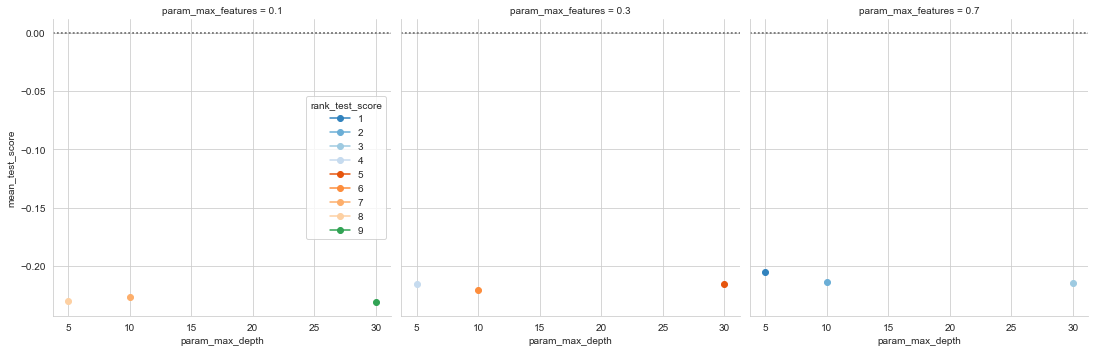

In [14]:
# Model 0: Decision Tree
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
import time

x_train = Train_encoded.drop(columns=['Id','SalePrice','SalePrice_log'])
Y_train = Train_encoded.SalePrice_log


# Set paramters for Grid Search CV
param_grid =  {
               'max_depth': [5, 10, 30],
               'max_features':[0.1, 0.3, 0.7],    
              }
DecTree = DecisionTreeRegressor(criterion = 'mse', random_state = 0 )

# Initialise Gridsearch CV with 5 fold corssvalidation and root mse for socirn


Tuned_DecTree = GridSearchCV(estimator=DecTree, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5)

# Fit model & Time the process for training the model
start_time = time.process_time()
Tuned_DecTree.fit(x_train, Y_train)
# End of fit time
print(time.process_time() - start_time, "Seconds")

# Generate results of best run 
Results = pd.DataFrame(Tuned_DecTree.cv_results_)
Results_Best = Results.loc[Results.rank_test_score==1]
    
print('Decision Tree Regressor')


# Initialize a grid of plots 

col = ['param_max_features']

for col in col:
    grid = sns.FacetGrid(Results, col=col, hue='rank_test_score', palette="tab20c", legend_out=False,
                         col_wrap=5, height=5)

    # Draw a horizontal line to show the starting point
    grid.map(plt.axhline, y=0, ls=":", c=".5")

    # Draw marker on plot and decide what parameters to plot
    grid.map(plt.plot, "param_max_depth", "mean_test_score", marker="o")

    # Adjust the arrangement of the plots
    grid.fig.tight_layout(w_pad=1)
    
    # Add legend to gird 
    grid.add_legend()
    
grid.savefig("RND.png")

Results_Best


75.484375 Seconds
Random Forest Regressor


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,1.171294,0.011594,0.179931,0.056055,0.3,400,"{'max_features': 0.3, 'n_estimators': 400}",-0.129404,-0.160995,-0.152339,-0.137654,-0.142075,-0.144493,0.011083,1


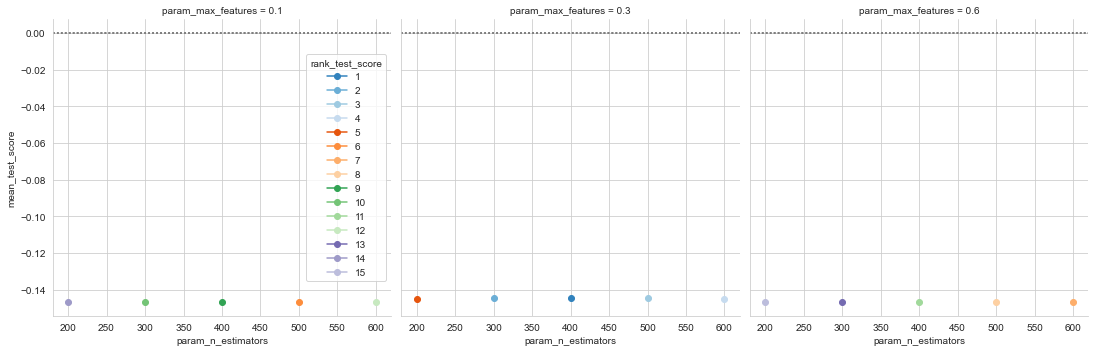

In [15]:
# Model 1: Ranbdom Forest Rgressor
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Split training data into features (x_train) and labels (Y_train)
x_train = Train_encoded.drop(columns=['Id','SalePrice','SalePrice_log'])
Y_train = Train_encoded.SalePrice_log


# Set paramters for Grid Search
param_grid =  {'n_estimators':[200, 300, 400, 500, 600],
               'max_features':[0.1, 0.3, 0.6]
              }
# Initialise the random forest model 
RandForest = RandomForestRegressor(n_jobs= -1, random_state = 0, bootstrap=True)

# Initialise Gridsearch CV with 5 fold corssvalidation and neggative root_mean_squared_error
Tuned_RandForest = GridSearchCV(estimator=RandForest, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5)

# Fit model & Time the process for training the model
start_time = time.process_time()
Tuned_RandForest.fit(x_train, Y_train)
# End of fit time
print(time.process_time() - start_time, "Seconds")

# Record the results for all models in a pandas dataframe and keep only the best model
Results = pd.DataFrame(Tuned_RandForest.cv_results_)
Results_Best = Results.loc[Results.rank_test_score==1]
    
print('Random Forest Regressor')
#Results = Results.loc[Results.rank_test_score==1]

# Create a plot to show all models 

col = ['param_max_features']

for col in col:
    grid = sns.FacetGrid(Results, col=col, hue='rank_test_score', palette="tab20c", legend_out=False,
                         col_wrap=5, height=5)

    # Draw a horizontal line to show the starting point
    grid.map(plt.axhline, y=0, ls=":", c=".5")

    # Draw marker on plot and decide what parameters to plot
    grid.map(plt.plot, "param_n_estimators", "mean_test_score", marker="o")

    # Adjust the arrangement of the plots
    grid.fig.tight_layout(w_pad=1)
    
    # Add legend to gird 
    grid.add_legend()
    
grid.savefig("RND.png")

Results_Best



200.59375 Seconds
Gradient Boosting Regressor


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,1.232672,0.027112,0.012969,0.000627,0.01,5,1000,"{'learning_rate': 0.01, 'max_depth': 5, 'n_est...",-0.110818,-0.143286,-0.135966,-0.118083,-0.124581,-0.126547,0.011763,1


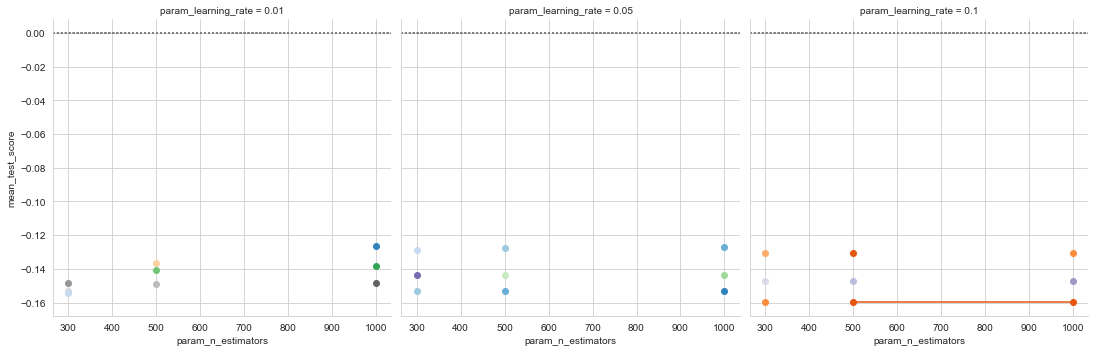

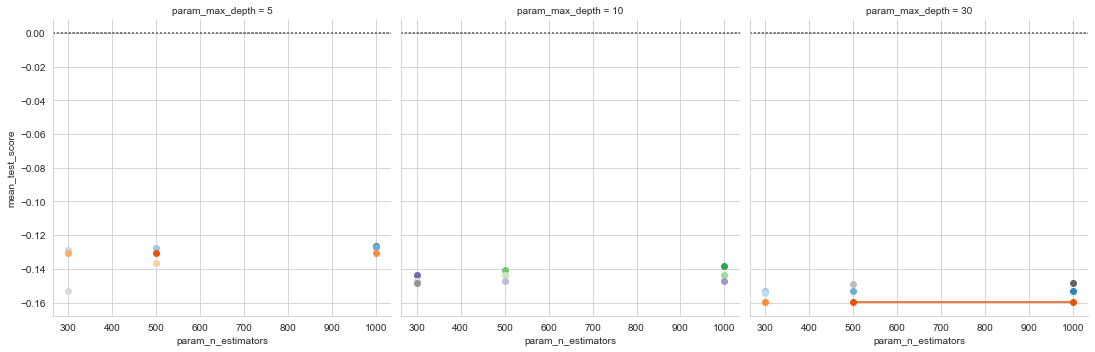

In [19]:
# Model 2:  Gradient bossted regressor 
from sklearn.ensemble import GradientBoostingRegressor


# Set paramters for Grid Search CV
param_grid =  {'n_estimators':[300, 500, 1000],
              'max_depth':[5, 10, 30],
              'learning_rate':[0.01, 0.05, 0.1]
              }
GBR = GradientBoostingRegressor(random_state=0, max_features = 'sqrt')

# Initialise Gridsearch CV with 5 fold corssvalidation and root mse for socirn
Tuned_GBR = GridSearchCV(estimator=GBR, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5)

# Fit model & Time the process for training the model
start_time = time.process_time()
Tuned_GBR.fit(x_train, Y_train)
# End of fit time
print(time.process_time() - start_time, "Seconds")

# Generate results of best run 
Results = pd.DataFrame(Tuned_GBR.cv_results_)
Results_Best = Results.loc[Results.rank_test_score==1]
    
print('Gradient Boosting Regressor')


# Initialize a grid of plots 

col = ['param_learning_rate', 'param_max_depth']

for col in col:
    grid = sns.FacetGrid(Results, col=col, hue='rank_test_score', palette="tab20c", legend_out=False,
                         col_wrap=5, height=5)

    # Draw a horizontal line to show the starting point
    grid.map(plt.axhline, y=0, ls=":", c=".5")

    # Draw marker on plot and decide what parameters to plot
    grid.map(plt.plot, "param_n_estimators", "mean_test_score", marker="o")

    # Adjust the arrangement of the plots
    grid.fig.tight_layout(w_pad=1)
    
    
    
    
grid.savefig("GBM.png")



Results_Best


In [17]:
# Run all models on test data 
x_test = Test_encoded.drop(columns=['Id'])
Test['SalePrice_DT'] = np.exp(Tuned_DecTree.predict(x_test))
Test['SalePrice_RDF'] = np.exp(Tuned_RandForest.predict(x_test))
Test['SalePrice_GBM'] = np.exp(Tuned_GBR.predict(x_test))




In [18]:
Test.to_csv(index=False,path_or_buf=r'C:\Users\johna\OneDrive\Documents\Kaggle Competitions\Advanced Regression Sale Price Prediction\rand_2021_5.csv')